In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
#will added this two line
from sklearn.metrics import r2_score, mean_squared_error

In [10]:
df = pd.read_csv("data/cleaned_data.csv")
df

,Unnamed: 0,Year,Month,Day,MaxT,MinT,AvgT,WindSpeed,Humidity,Precipitation,Rainfall,ExtremeRainfall
0,1454,2010,1,1,29.7,20.5,25.10,2.5,74.2,0.0,1,False
1,1455,2010,1,2,28.7,20.8,24.75,2.3,70.1,0.0,1,False
2,1456,2010,1,3,29.4,18.8,24.10,2.0,71.4,0.0,1,False
3,1457,2010,1,4,29.8,18.5,24.15,2.2,61.6,0.0,1,False
4,1458,2010,1,5,30.1,19.7,24.90,2.0,68.0,0.0,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
4743,6197,2022,12,27,34.0,21.0,27.50,2.0,72.0,0.0,1,False
4744,6198,2022,12,28,35.0,21.0,28.00,1.6,68.0,0.0,1,False
4745,6199,2022,12,29,35.0,22.0,28.50,1.8,67.0,0.0,1,False
4746,6200,2022,12,30,35.0,21.0,28.00,1.2,64.5,0.0,1,False


In [11]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [12]:
df.isna().sum()

Year               0
Month              0
Day                0
MaxT               0
MinT               0
AvgT               0
WindSpeed          0
Humidity           0
Precipitation      0
Rainfall           0
ExtremeRainfall    0
dtype: int64

# Data Info
Maximum Temperature(°C)<br>
Minimum Temperature(°C)<br>
Humidity(%)<br>
Precipitation(mm)<br>

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4748 entries, 0 to 4747
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             4748 non-null   int64  
 1   Month            4748 non-null   int64  
 2   Day              4748 non-null   int64  
 3   MaxT             4748 non-null   float64
 4   MinT             4748 non-null   float64
 5   AvgT             4748 non-null   float64
 6   WindSpeed        4748 non-null   float64
 7   Humidity         4748 non-null   float64
 8   Precipitation    4748 non-null   float64
 9   Rainfall         4748 non-null   int64  
 10  ExtremeRainfall  4748 non-null   bool   
dtypes: bool(1), float64(6), int64(4)
memory usage: 375.7 KB


In [14]:
df.describe()

,Year,Month,Day,MaxT,MinT,AvgT,WindSpeed,Humidity,Precipitation,Rainfall
count,4748.00000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.00000,4748.000000,4748.000000
mean,2016.00000,6.523168,15.728939,33.359183,24.782056,29.070619,2.855055,67.58056,3.447683,0.776116
std,3.74177,3.449001,8.800724,3.357061,3.097914,2.943477,1.021489,11.66672,8.430026,0.416889
min,2010.00000,1.000000,1.000000,21.900000,14.400000,20.550000,0.900000,30.50000,0.000000,0.000000
25%,2013.00000,4.000000,8.000000,30.900000,22.600000,26.850000,2.100000,59.70000,0.000000,1.000000
50%,2016.00000,7.000000,16.000000,33.000000,25.400000,29.050000,2.600000,68.70000,0.000000,1.000000
75%,2019.00000,10.000000,23.000000,35.300000,27.000000,31.000000,3.400000,76.50000,2.500000,1.000000
max,2022.00000,12.000000,31.000000,48.000000,33.000000,39.500000,7.900000,95.10000,128.300000,1.000000


## Precipitation as our target variable

Most days of the year it doesn't rain. Finding the months when it rains could be helpful to see a pattern. Average rain is about 3.43(mm).<br>
We also need to check the features that have the most correlation with Precipitation. <br>
We could have a classification model as well checking if it will rain or not and have a regression model on how much in mm will it rain.

<Axes: >

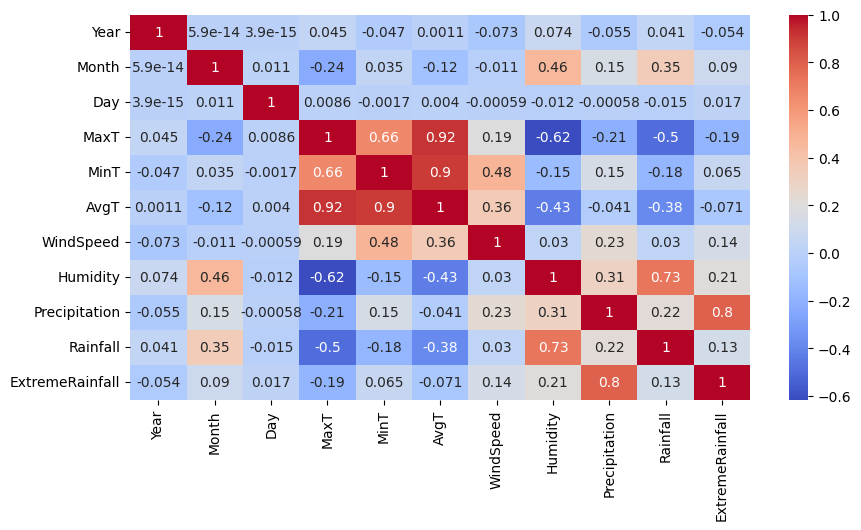

In [15]:
# A correlation heat map for each pair of explanatory variables.
plt.figure(figsize=(10, 5))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Data Correlation
As expected, 'ExtremeRainfall' and 'Rainfall' have the most correlation, but 'Windspeed' = 0.24 and 'Humidity' = 0.31 have a weak correlation with 'Precipitation'. As well as, 'Month', 'MaxT' and 'MinT' have some but weak correlation.

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Month'}>,
        <Axes: title={'center': 'Day'}>],
       [<Axes: title={'center': 'MaxT'}>,
        <Axes: title={'center': 'MinT'}>,
        <Axes: title={'center': 'AvgT'}>],
       [<Axes: title={'center': 'WindSpeed'}>,
        <Axes: title={'center': 'Humidity'}>,
        <Axes: title={'center': 'Precipitation'}>],
       [<Axes: title={'center': 'Rainfall'}>, <Axes: >, <Axes: >]],
      dtype=object)

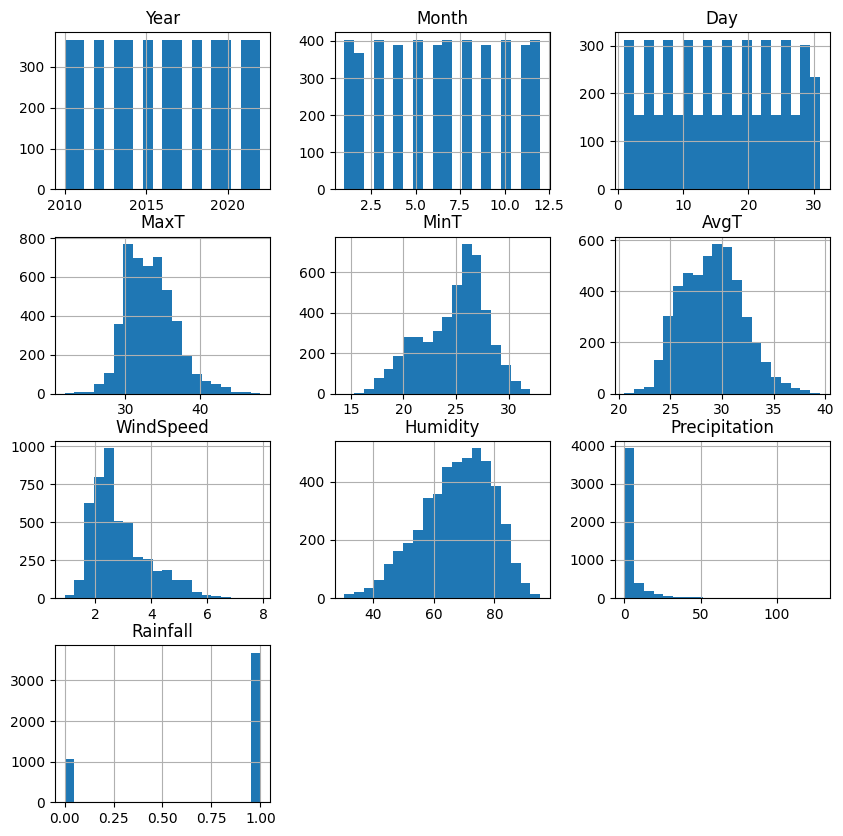

In [16]:
# Histograms for each feature
df.hist(figsize=(10, 10), bins=20)

# Train and Test split

Initially I will make a model only to predict if it rained or not.

In [17]:
df

,Year,Month,Day,MaxT,MinT,AvgT,WindSpeed,Humidity,Precipitation,Rainfall,ExtremeRainfall
0,2010,1,1,29.7,20.5,25.10,2.5,74.2,0.0,1,False
1,2010,1,2,28.7,20.8,24.75,2.3,70.1,0.0,1,False
2,2010,1,3,29.4,18.8,24.10,2.0,71.4,0.0,1,False
3,2010,1,4,29.8,18.5,24.15,2.2,61.6,0.0,1,False
4,2010,1,5,30.1,19.7,24.90,2.0,68.0,0.0,1,False
...,...,...,...,...,...,...,...,...,...,...,...
4743,2022,12,27,34.0,21.0,27.50,2.0,72.0,0.0,1,False
4744,2022,12,28,35.0,21.0,28.00,1.6,68.0,0.0,1,False
4745,2022,12,29,35.0,22.0,28.50,1.8,67.0,0.0,1,False
4746,2022,12,30,35.0,21.0,28.00,1.2,64.5,0.0,1,False


In [18]:
rainfall_df = df.drop(['ExtremeRainfall'], axis=1)
rainfall_df

,Year,Month,Day,MaxT,MinT,AvgT,WindSpeed,Humidity,Precipitation,Rainfall
0,2010,1,1,29.7,20.5,25.10,2.5,74.2,0.0,1
1,2010,1,2,28.7,20.8,24.75,2.3,70.1,0.0,1
2,2010,1,3,29.4,18.8,24.10,2.0,71.4,0.0,1
3,2010,1,4,29.8,18.5,24.15,2.2,61.6,0.0,1
4,2010,1,5,30.1,19.7,24.90,2.0,68.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...
4743,2022,12,27,34.0,21.0,27.50,2.0,72.0,0.0,1
4744,2022,12,28,35.0,21.0,28.00,1.6,68.0,0.0,1
4745,2022,12,29,35.0,22.0,28.50,1.8,67.0,0.0,1
4746,2022,12,30,35.0,21.0,28.00,1.2,64.5,0.0,1


In [19]:
from sklearn.model_selection import train_test_split

X = df.drop(['Rainfall'], axis=1)
y = df['Rainfall']

trainX, testX, trainY, testY = train_test_split(X,y,test_size=0.2, random_state=42)

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(trainX)
X_test_scaled = scaler.transform(testX)

In [21]:
# Initialize the Linear Regression model
lg_model = LogisticRegression()

# Fit the model on the training data
lg_model.fit(trainX, trainY)

# Predict on the testing set
lg_pred = model.predict(testX)

NameError: name 'LogisticRegression' is not defined

In [ ]:
# Calculate the Mean Squared Error (MSE) and R-squared value for evaluation
mse_lg = mean_squared_error(testY, lg_pred)
r2_lg = r2_score(testY, lg_pred)

# Print the MSE and R-squared value
print(f"Mean Squared Error for Logistic Regression: {mse_lg}")
print(f"R-squared Value for Logistic Regression: {r2_lg}")

Mean Squared Error for Logistic Regression: 0.009615384615384616
R-squared Value for Logistic Regression: 0.9487179487179487


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dTreeModel = DecisionTreeClassifier()

# Fit the model on the training data
dTreeModel.fit(trainX, trainY)

# Predict on the testing set
dt_pred = dTreeModel.predict(testX)

In [ ]:
# Calculate the Mean Squared Error (MSE) and R-squared value for evaluation
mse = mean_squared_error(testY, dt_pred)
r2 = r2_score(testY, dt_pred)

# Print the MSE and R-squared value
print(f"Mean Squared Error for Decision Tree: {mse}")
print(f"R-squared Value for Decision Tree: {r2}")

Mean Squared Error for Decision Tree: 0.0
R-squared Value for Decision Tree: 1.0


In [ ]:
et_df = df.drop(['Rainfall'], axis=1)
et_df

,Year,Month,Day,MaxT,MinT,AvgT,WindSpeed,Humidity,Precipitation,ExtremeRainfall
0,2006,1,8,29.5,21.8,25.65,1.6,70.2,0.0,False
1,2006,1,9,30.1,21.0,25.55,1.6,67.4,0.0,False
2,2006,1,10,29.9,21.1,25.50,1.7,65.2,0.0,False
3,2006,1,11,29.8,20.8,25.30,1.5,69.0,0.0,False
4,2006,1,12,29.6,20.5,25.05,2.1,69.5,0.0,False
...,...,...,...,...,...,...,...,...,...,...
6231,2023,1,30,34.0,19.0,26.50,4.0,63.0,0.0,False
6232,2023,1,31,37.0,19.0,28.00,2.9,57.5,0.0,False
6233,2023,2,1,34.0,20.0,27.00,2.3,55.0,0.0,False
6234,2023,2,2,38.0,19.0,28.50,2.4,54.0,0.0,False


In [ ]:
X_dt = df.drop(['Ext'], axis=1)
y_dt = df['Rainfall']

trainX, testX, trainY, testY = train_test_split(X,y,test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dTreeModel = DecisionTreeClassifier()

# Fit the model on the training data
dTreeModel.fit(trainX, trainY)

# Predict on the testing set
dt_pred = dTreeModel.predict(testX)

In [ ]:
# Calculate the Mean Squared Error (MSE) and R-squared value for evaluation




mse = mean_squared_error(testY, dt_pred)
r2 = r2_score(testY, dt_pred)

# Print the MSE and R-squared value
print(f"Mean Squared Error for Decision Tree: {mse}")
print(f"R-squared Value for Decision Tree: {r2}")


#saving our model to a pickle, for transfer to streamlit
filename = 'rainfall_prediction_model.pkl'
pickle.dump(dTreeModel, open(filename, 'wb')) 

NameError: name 'mean_squared_error' is not defined